In [1]:
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv("../data/NSDUH_2019_Tab.txt", sep="\t")

/root/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2575) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
race_dict = {1 : "white",
2 : "black",
3 : "other/mixed",
4 : "other/mixed",
5 : "other/mixed",
6 : "other/mixed",
7 : "hispanic/latino"}

In [4]:
sex_dict = {
    1: "Male",
    2: "Female"
}

In [5]:
age_dict = {
    1: "12-17 Years Old",
    2: "18-25 Years Old",
    3: "26-34 Years Old",
    4: "35-49 Years Old",
    5: "50 or Older",
}

In [6]:
def usage(n):
    if n <= 30:
        return n
    else:
        return 0

In [105]:
df.NEWRACE2 = df.NEWRACE2.map(race_dict)
df.CATAG3 = df.CATAG3.map(age_dict)
df.IRSEX = df.IRSEX.map(sex_dict)
df.MJDAY30A = df.MJDAY30A.map(usage)

In [117]:
cross = pd.crosstab(df.MJDAY30A, [df.NEWRACE2, df.CATAG3, df.IRSEX], normalize="columns")
cross_mult = cross.multiply(cross.index, axis="rows")
cross_sum = cross_mult.sum(axis="rows") / 30

In [126]:
cross_sum.values.reshape((dim, dim, cross_sum.shape[1]))

5

In [140]:
x = cross_sum.to_xarray().values.copy()
neg_x = 1 - x.copy()
CPT = np.stack([x, neg_x], axis=-1)

<AxesSubplot:xlabel='NEWRACE2,CATAG3,IRSEX'>

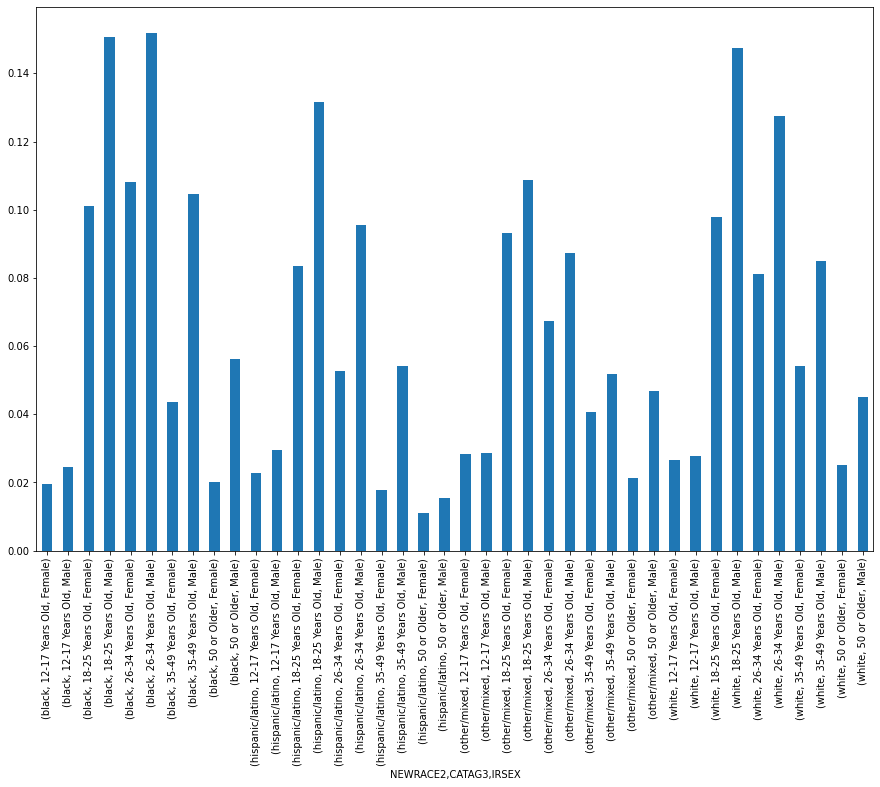

In [118]:
cross_sum.plot(kind="bar")

Formulate following variables/CPTs: 

- Age
- Race 
- Sex
- P(Daily Usage) = 1 / F(Daily Usage)
- P(Caught Using) = Adjusted Ratio (given daily usage) of Sample and Population Demographics